<a href="https://colab.research.google.com/github/vishvpatel17/Task-4-Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')


In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [ ]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Fill missing Embarked with the most common value (Mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# Drop 'Cabin' as it has too many missing values
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

In [ ]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
# Convert Categorical 'Sex' and 'Embarked' to numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

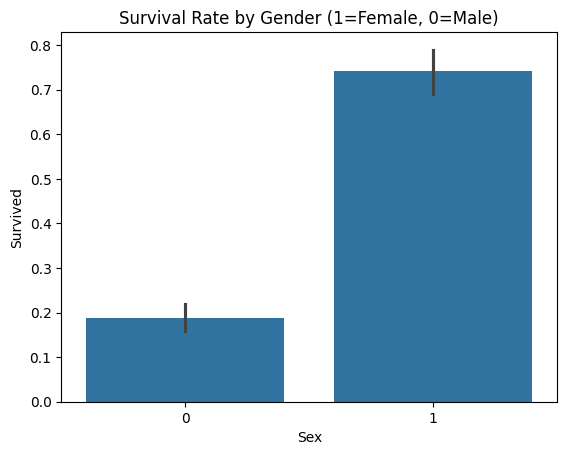

In [ ]:
# Visualizing survival rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender (1=Female, 0=Male)')
plt.show()

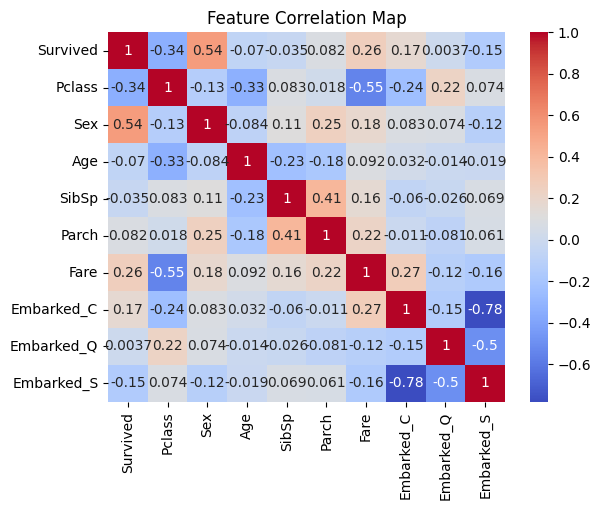

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Map')
plt.show()

In [ ]:
# Define Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# Split data (80% Training, 20% Testing)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply Random Forest for higher accuracy
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Check Accuracy
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 81.56%
